In [80]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
X = np.array([["Red", "Sports", "Domestic"],
              ["Red", "Sports", "Domestic"], 
              ["Red", "Sports", "Domestic"], 
              ["Yellow", "Sports", "Domestic"], 
              ["Yellow", "Sports", "Imported"],
              ["Yellow", "SUV", "Imported"], 
              ["Yellow", "SUV", "Imported"], 
              ["Yellow", "SUV", "Domestic"],
              ["Red", "SUV", "Imported"], 
              ["Red", "Sports", "Imported"]])
Y = np.array(["Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Yes"])

In [82]:
X = pd.DataFrame(X, columns=["color", "type", "origin"])
X.sample(5)

,color,type,origin
8,Red,SUV,Imported
9,Red,Sports,Imported
6,Yellow,SUV,Imported
4,Yellow,Sports,Imported
3,Yellow,Sports,Domestic


In [83]:
X_now = pd.get_dummies(X)
X_now.sample(5)

,color_Red,color_Yellow,type_SUV,type_Sports,origin_Domestic,origin_Imported
5,False,True,True,False,False,True
7,False,True,True,False,True,False
8,True,False,True,False,False,True
9,True,False,False,True,False,True
0,True,False,False,True,True,False


In [84]:
Y = pd.DataFrame(Y, columns=["stolen"])
Y_now = pd.get_dummies(Y, drop_first=True)
Y_now.sample(5)

,stolen_Yes
4,True
9,True
8,False
3,False
6,True


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_now, Y_now, test_size=0.2, random_state=42)

In [86]:
clf = DecisionTreeClassifier()
clf.fit(X_now, Y_now)

DecisionTreeClassifier()

In [87]:
# Y_pred = clf.predict(X_test)
# accuracy = accuracy_score(Y_test, Y_pred)
# print("Accuracy:", accuracy)

In [88]:
new_car = np.array([["Yellow", "Sport", "Imported"]])
X_new = np.array([[0, 1, 0, 1, 0, 1]])
print(clf.predict_proba(X_new))

[[0. 1.]]


In [89]:
new_car = np.array([["Red", "SUV", "Domestic"]])
X_new = np.array([[1, 0, 1, 0, 1, 0]])
print(clf.predict_proba(X_new))

[[1. 0.]]


In [90]:
%matplotlib inline

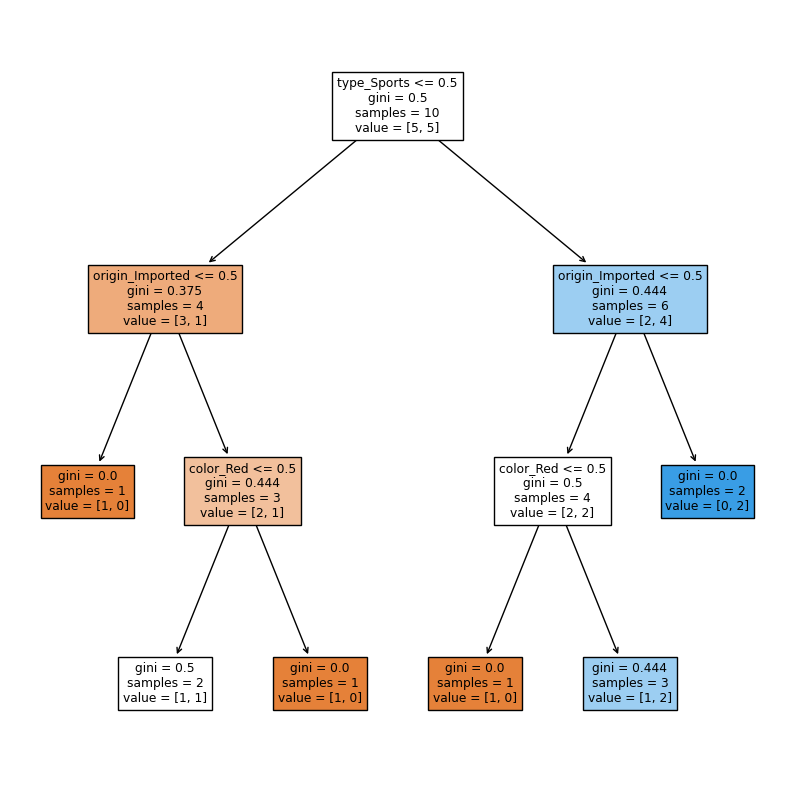

In [92]:
fig = plt.figure(figsize=(10, 10))
_ = tree.plot_tree(clf, feature_names=X_now.columns, filled=True)